In [ ]:
#pip install selenium webdriver-manager

# Web Scraping using Selenium

In [2]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
import pandas as pd
import time
import io

# Path to save the review data
path = '/Data Science/Project/web_scraping/'

In [3]:
# Initialize Selenium WebDriver
options = webdriver.ChromeOptions()
options.add_argument("--start-maximized")  
driver = webdriver.Chrome(options=options)

# To store reviews
reviews = []

for i in range(1, 100):  # Range for the number of pages to scrape
    url = f'https://uk.trustpilot.com/review/www.amazon.com?page={i}'
    driver.get(url)
    
    # Wait for the reviews section to load
    try:
        WebDriverWait(driver, 15).until(
            EC.presence_of_all_elements_located((By.CSS_SELECTOR, 'section[class*="reviewContent"]'))
        )
    except:
        print(f"Failed to load reviews on page {i}")
        continue
    
    # Get the page source
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    
    # Extract reviews (adjust if needed based on the HTML structure)
    review_elements = soup.select('section[class*="reviewContent"] p')  # Adjust the 'p' if reviews are in other tags
    if not review_elements:
        print(f"No reviews found on page {i}")
    for review_element in review_elements:
        reviews.append(review_element.text.strip())
    
    # Save HTML (optional)
    with io.open(f"{path}amazon_page_{i}.html", "w", encoding="utf-8") as f:
        f.write(html)
    
    time.sleep(2)  # Avoid overloading the server

# Quit the driver
driver.quit()

In [4]:
# Save to DataFrame
final_df = pd.DataFrame({'Reviews': reviews})
final_df.to_csv(f"{path}amazon_reviews.csv", index=False)
print("Scraping completed.")

Scraping completed.


# Sentiment Analysis

In [5]:
# !/Applications/Python\ 3.11/Install\ Certificates.command
# import nltk
# nltk.download('vader_lexicon')


In [6]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Load the reviews dataset
path = '/Data Science/Project/web_scraping/amazon_reviews.csv'
df = pd.read_csv(path)

In [7]:
# Remove rows with dates (alternate rows are dates)
df = df[df.index % 2 == 0].reset_index(drop=True)  # Keep only review rows

# Sentiment scores
df['Sentiment Score'] = df['Reviews'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Add sentiment label based on score
def sentiment_label(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Sentiment Score'].apply(sentiment_label)

# Save the updated DataFrame to a new CSV
output_path = '/Data Science/Project/web_scraping/amazon_reviews_with_sentiment.csv'
df.to_csv(output_path, index=False)

print("Sentiment analysis completed. Data saved to:", output_path)


Sentiment analysis completed. Data saved to: /Users/amitkumar/Library/CloudStorage/OneDrive-TheUniversityofNottingham/Data Science/Project/web_scraping/amazon_reviews_with_sentiment.csv


/var/folders/8z/96_p5y5s313_8b55fgygvygh0000gn/T/ipykernel_73737/3812789081.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df, palette='viridis')


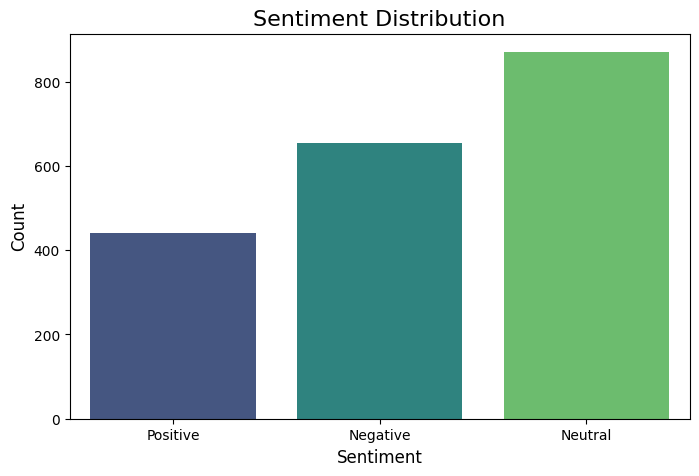

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the sentiment-analyzed dataset
#input_path = '/Data Science/Project/web_scraping/amazon_reviews_with_sentiment.csv'
#df = pd.read_csv(input_path)

# Distribution of Sentiments
plt.figure(figsize=(8, 5))
sns.countplot(x='Sentiment', data=df, palette='viridis')
plt.title('Sentiment Distribution', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

In [9]:
# Percentage Analysis
sentiment_counts = df['Sentiment'].value_counts()
sentiment_percentages = (sentiment_counts / len(df)) * 100

In [10]:
# Summary Analysis
print("Sentiment Analysis Summary:")
print(sentiment_counts)
print("\nPercentage Distribution:")
print(sentiment_percentages)

Sentiment Analysis Summary:
Sentiment
Neutral     870
Negative    654
Positive    440
Name: count, dtype: int64

Percentage Distribution:
Sentiment
Neutral     44.297352
Negative    33.299389
Positive    22.403259
Name: count, dtype: float64


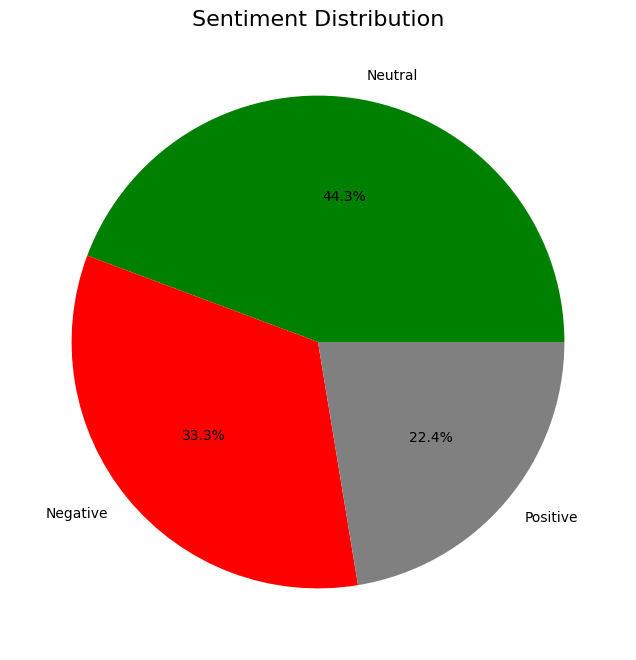

In [11]:
# Plot sentiment distribution as a pie chart
plt.figure(figsize=(8, 8))
df['Sentiment'].value_counts().plot.pie(autopct='%1.1f%%', colors=['green', 'red', 'gray'])
plt.title('Sentiment Distribution', fontsize=16)
plt.ylabel('')
plt.show()


## Relationship between review length and sentiment

/var/folders/8z/96_p5y5s313_8b55fgygvygh0000gn/T/ipykernel_73737/3681352171.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sentiment', y='Review Length', data=df, palette='viridis')


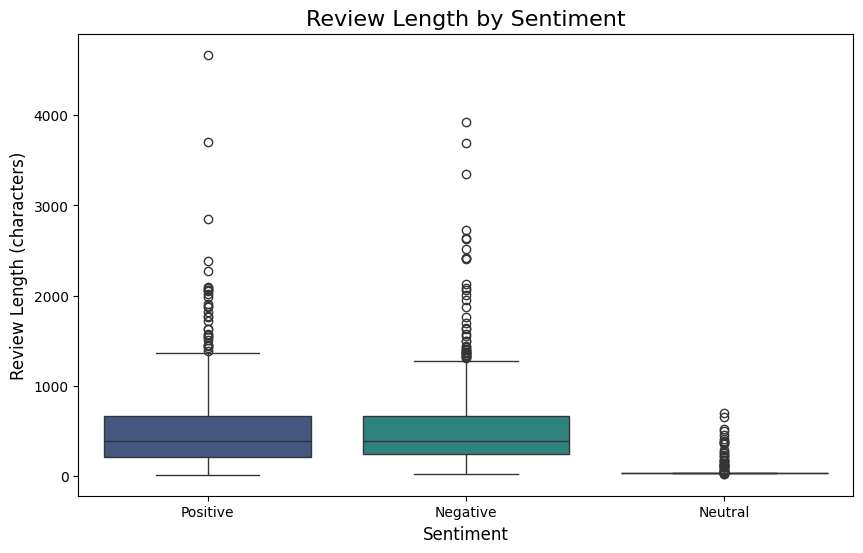

In [12]:
# Calculate review length
df['Review Length'] = df['Reviews'].apply(len)

# Boxplot to compare review lengths by sentiment
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sentiment', y='Review Length', data=df, palette='viridis')
plt.title('Review Length by Sentiment', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Review Length (characters)', fontsize=12)
plt.show()
